     LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean  \
1         10.125         18.0            74.7   yes  female        no   
2          9.550         16.0            69.7    no  female       yes   
3         11.125         14.0            71.0    no    male        no   
4          4.800          5.0            56.9    no    male        no   
5          6.225         11.0            58.7    no  female        no   
..           ...          ...             ...   ...     ...       ...   
740        9.325         14.0            65.5    no    male        no   
741        9.925         16.0            68.3    no  female        no   
742        8.725         19.0            68.4    no  female        no   
743        7.075         11.0            66.7    no    male       yes   
744        8.825         16.0            71.3   yes  female        no   

     No of children  Weight (kg)  
1                 0        98.75  
2                 0        11.01  
3                 

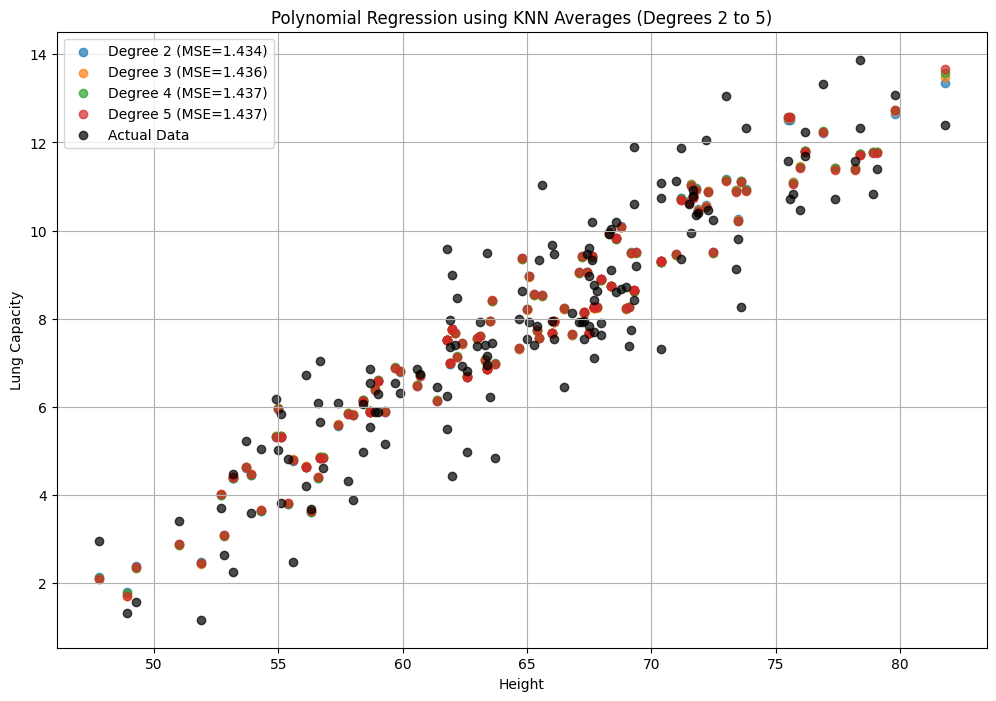

Degree 2: MSE = 1.434
Degree 3: MSE = 1.436
Degree 4: MSE = 1.437
Degree 5: MSE = 1.437


In [58]:
import pandas as pd
import numpy as np




df = pd.read_csv('lungcapacity.csv')
#df = df.dropna(subset=['Height(inches)'])  # Drops rows where 'Height' has NaN


# use linear reg to predict lung capacity given height



df = df.dropna()
print(df)

x = df['Height(inches)'].values.reshape(-1, 1)
y = df['LungCap(cc)']

print(y)

import numpy as np
import pandas as pd

def knn(x, y, k):
    n = len(y)
    y_pred = np.zeros(n)  # Initialize predictions array

    for i in range(n):
        # Exclude the current point
        distances = np.abs(x[i] - np.delete(x, i))  # Calculate absolute differences
        neighbors = np.delete(y, i)  # Exclude current target value

        # Combine distances and neighbors into a DataFrame for sorting
        d = pd.DataFrame({'distances': distances, 'neighbors': neighbors})

        # Sort by distance
        d_sorted = d.sort_values(by='distances')

        # Select k nearest neighbors
        nearest_neighbors = d_sorted['neighbors'][:k]

        # Compute prediction as the mean of the k nearest neighbors
        y_pred[i] = nearest_neighbors.mean()

    return y_pred


# Apply KNN with k=3
k = 3
yhat = knn(x, y, k)

# Print predictions
print("Predictions:", yhat)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load and clean the data
df = pd.read_csv('lungcapacity.csv')
df = df.dropna()

x = df['Height(inches)'].values.reshape(-1, 1)
y = df['LungCap(cc)']

# Custom KNN Regressor
def knn(x_train, y_train, x_query, k=3):
    """
    Custom KNN regressor.
    
    Parameters:
    - x_train: Training data inputs (1D array).
    - y_train: Training data targets (1D array).
    - x_query: Query points for predictions (1D array).
    - k: Number of neighbors.
    
    Returns:
    - y_pred: Predicted target values for x_query.
    """
    y_train = np.array(y_train)
    y_pred = np.zeros(len(x_query))  # Initialize predictions array

    for i, x in enumerate(x_query):
        # Compute distances from the query point to all training points
        distances = np.abs(x_train - x)
        # Get indices of the k nearest neighbors
        neighbor_indices = np.argsort(distances)[:k]
        # Predict as the mean of the neighbors' target values
        y_pred[i] = y_train[neighbor_indices].mean()
    
    return y_pred

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Custom KNN Regressor
k = 3
y_pred_knn_train = knn(X_train.flatten(), y_train, X_train.flatten(), k)
y_pred_knn_test = knn(X_train.flatten(), y_train, X_test.flatten(), k)

# Loop through degrees 2 to 5
degrees = [2, 3, 4, 5]
mse_values = []

plt.figure(figsize=(12, 8))

for degree in degrees:
    # Polynomial Feature Transformation
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(y_pred_knn_train.reshape(-1, 1))
    X_poly_test = poly.transform(y_pred_knn_test.reshape(-1, 1))

    # Fit Polynomial Regression Model
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)

    # Predict and evaluate
    y_pred_poly = poly_model.predict(X_poly_test)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mse_values.append(mse_poly)

    # Plotting predictions
    plt.scatter(X_test, y_pred_poly, label=f'Degree {degree} (MSE={mse_poly:.3f})', alpha=0.7)

# Plotting actual data
plt.scatter(X_test, y_test, color='black', label='Actual Data', alpha=0.7)

# Plot settings
plt.title("Polynomial Regression using KNN Averages (Degrees 2 to 5)")
plt.xlabel("Height")
plt.ylabel("Lung Capacity")
plt.legend()
plt.grid(True)
plt.show()

# Print MSE for each degree
for degree, mse in zip(degrees, mse_values):
    print(f"Degree {degree}: MSE = {mse:.3f}")


Bootstrap Results:
Degree 2: APSE = 1.343, Variance = 0.000
Degree 3: APSE = 1.344, Variance = 0.000
Degree 4: APSE = 1.356, Variance = 0.000
Degree 5: APSE = 1.344, Variance = 0.000
Degree 6: APSE = 1.354, Variance = 0.001
Degree 7: APSE = 1.357, Variance = 0.001
Degree 8: APSE = 1.360, Variance = 0.002
Degree 9: APSE = 1.364, Variance = 0.002
Degree 10: APSE = 1.368, Variance = 0.003

K-Fold Cross-Validation Results:
Degree 2: APSE = 1.196, Variance = 0.023
Degree 3: APSE = 1.199, Variance = 0.022
Degree 4: APSE = 1.201, Variance = 0.025
Degree 5: APSE = 1.204, Variance = 0.023
Degree 6: APSE = 1.208, Variance = 0.022
Degree 7: APSE = 1.209, Variance = 0.022
Degree 8: APSE = 1.210, Variance = 0.022
Degree 9: APSE = 1.210, Variance = 0.022
Degree 10: APSE = 1.210, Variance = 0.022


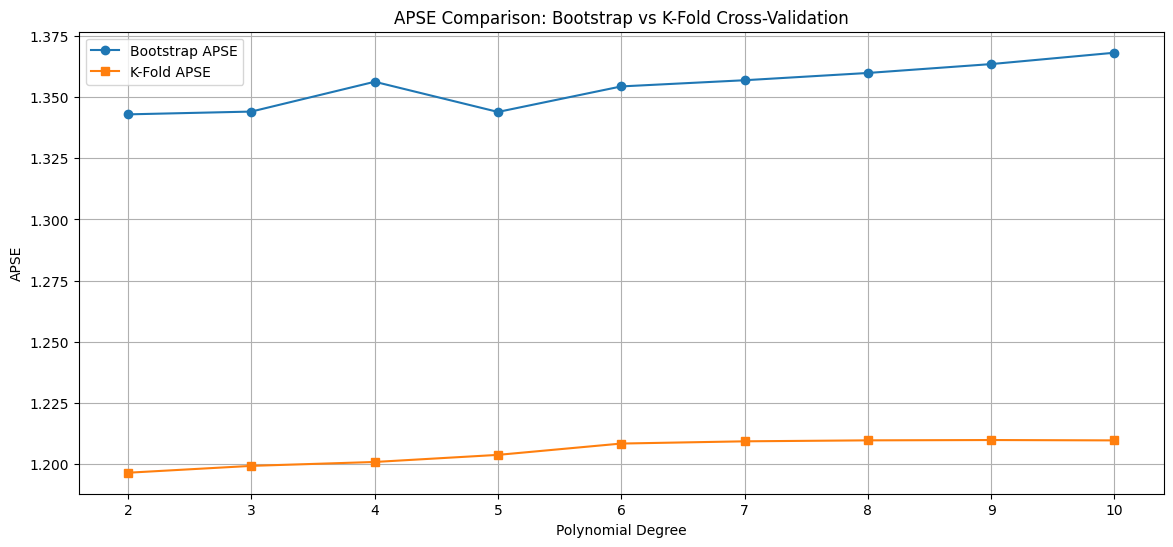

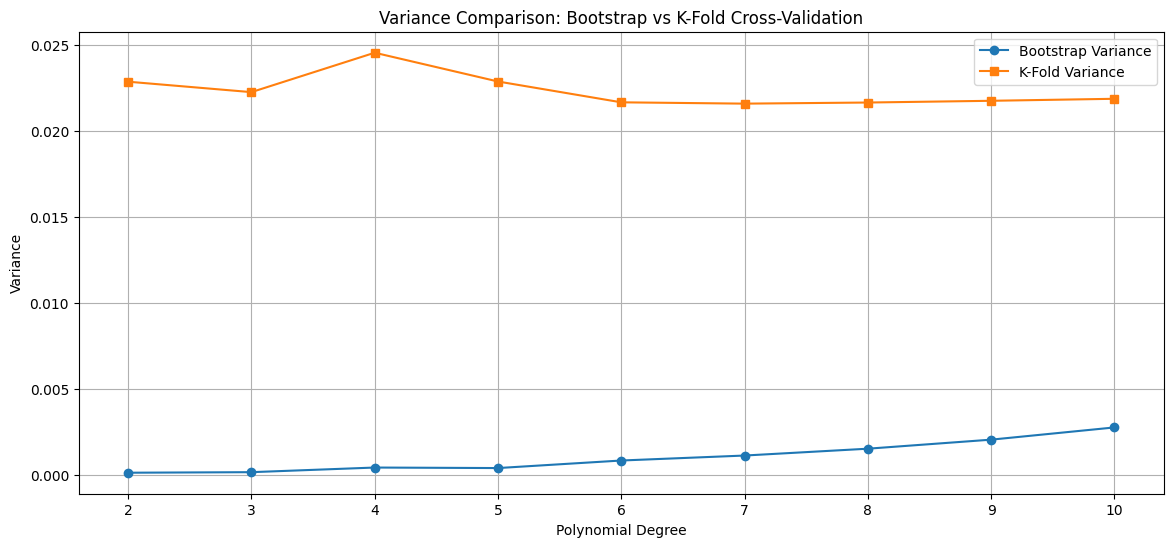

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and clean the data
df = pd.read_csv('lungcapacity.csv')
df = df.dropna()

x = df['Height(inches)'].values.reshape(-1, 1)
y = df['LungCap(cc)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bootstrap Method
# Bootstrap Method
def bootstrap_samples(X_train, y_train, n_bootstrap=1000, max_degree=10):
    # Ensure inputs are NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    mse_bootstrap = {degree: [] for degree in range(2, max_degree + 1)}

    for _ in range(n_bootstrap):
        # Sample with replacement
        indices = np.random.choice(len(X_train), len(X_train), replace=True)
        X_sample = X_train[indices]
        y_sample = y_train[indices]

        for degree in range(2, max_degree + 1):
            # Polynomial Regression
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X_sample)
            model = LinearRegression()
            model.fit(X_poly, y_sample)

            # Predict and calculate MSE
            y_pred = model.predict(poly.transform(X_test))
            mse = mean_squared_error(y_test, y_pred)
            mse_bootstrap[degree].append(mse)

    # Compute APSE and variance
    apse_bootstrap = {degree: np.mean(mse_bootstrap[degree]) for degree in mse_bootstrap}
    variance_bootstrap = {degree: np.var(mse_bootstrap[degree]) for degree in mse_bootstrap}

    return apse_bootstrap, variance_bootstrap


# K-Fold Cross-Validation
def kfold_cross_validation(X_train, y_train, k=5, max_degree=10):
    # Ensure inputs are NumPy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_kfold = {degree: [] for degree in range(2, max_degree + 1)}

    for train_idx, val_idx in kf.split(X_train):
        # Train-test split for the fold
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        for degree in range(2, max_degree + 1):
            # Polynomial Regression
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X_train_fold)
            model = LinearRegression()
            model.fit(X_poly, y_train_fold)

            # Predict and calculate MSE
            y_pred = model.predict(poly.transform(X_val_fold))
            mse = mean_squared_error(y_val_fold, y_pred)
            mse_kfold[degree].append(mse)

    # Compute APSE and variance
    apse_kfold = {degree: np.mean(mse_kfold[degree]) for degree in mse_kfold}
    variance_kfold = {degree: np.var(mse_kfold[degree]) for degree in mse_kfold}

    return apse_kfold, variance_kfold



# Apply Bootstrap
apse_bootstrap, variance_bootstrap = bootstrap_samples(X_train, y_train)

# Apply K-Fold Cross-Validation
apse_kfold, variance_kfold = kfold_cross_validation(X_train, y_train)

# Display Results
print("Bootstrap Results:")
for degree in apse_bootstrap:
    print(f"Degree {degree}: APSE = {apse_bootstrap[degree]:.3f}, Variance = {variance_bootstrap[degree]:.3f}")

print("\nK-Fold Cross-Validation Results:")
for degree in apse_kfold:
    print(f"Degree {degree}: APSE = {apse_kfold[degree]:.3f}, Variance = {variance_kfold[degree]:.3f}")

# Plot APSE
degrees = list(range(2, 11))
plt.figure(figsize=(14, 6))
plt.plot(degrees, [apse_bootstrap[d] for d in degrees], label="Bootstrap APSE", marker='o')
plt.plot(degrees, [apse_kfold[d] for d in degrees], label="K-Fold APSE", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("APSE")
plt.title("APSE Comparison: Bootstrap vs K-Fold Cross-Validation")
plt.legend()
plt.grid(True)
plt.show()

# Plot Variance
plt.figure(figsize=(14, 6))
plt.plot(degrees, [variance_bootstrap[d] for d in degrees], label="Bootstrap Variance", marker='o')
plt.plot(degrees, [variance_kfold[d] for d in degrees], label="K-Fold Variance", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("Variance")
plt.title("Variance Comparison: Bootstrap vs K-Fold Cross-Validation")
plt.legend()
plt.grid(True)
plt.show()


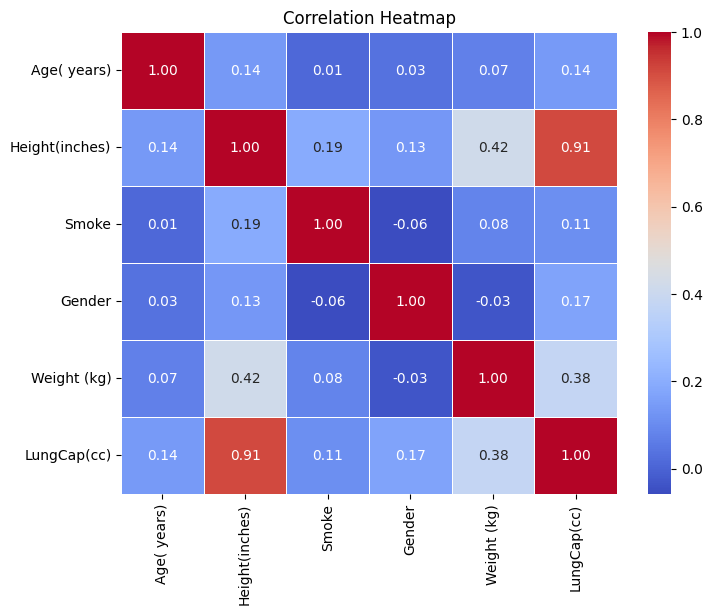


Correlations with Lung Capacity (cc):
LungCap(cc)       1.000000
Height(inches)    0.910325
Weight (kg)       0.378313
Gender            0.165444
Age( years)       0.141681
Smoke             0.109767
Name: LungCap(cc), dtype: float64


In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data


# Gender: 0 = Female, 1 = Male
df["Gender"] = df["Gender"].map({"female": 0, "male": 1})

# Smoke: 0 = No, 1 = Yes
df["Smoke"] = df["Smoke"].map({"no": 0, "yes": 1})

# Features and target variable
X = df[["Age( years)", "Height(inches)", "Smoke", "Gender", "Weight (kg)"]]
y = df["LungCap(cc)"]

# Reshaping the feature columns
# Reshaping the feature columns with .loc to avoid SettingWithCopyWarning
X.loc[:, "Age( years)"] = X["Age( years)"].values.reshape(-1, 1)
X.loc[:, "Height(inches)"] = X["Height(inches)"].values.reshape(-1, 1)
X.loc[:, "Weight (kg)"] = X["Weight (kg)"].values.reshape(-1, 1)
X.loc[:, "Smoke"] = X["Smoke"].values.reshape(-1, 1)
X.loc[:, "Gender"] = X["Gender"].values.reshape(-1, 1)



# Correlation Analysis between features and lung capacity
correlation_matrix = df[["Age( years)", "Height(inches)", "Smoke", "Gender", "Weight (kg)", "LungCap(cc)"]].corr()

# Display the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Correlations with LungCap(cc)
lungcap_correlations = correlation_matrix["LungCap(cc)"].sort_values(ascending=False)
print("\nCorrelations with Lung Capacity (cc):")
print(lungcap_correlations)





Average Lung Capacity by Gender:
        LungCap(cc)
Gender             
0          7.414738
1          8.294460

Average Lung Capacity by Smoking Status:
       LungCap(cc)
Smoke             
0.0       7.753032
1.0       8.689610

Average Lung Capacity by Age Group:
           LungCap(cc)
Age Group             
0-20           7.84739

Average Lung Capacity by Height Group:
              LungCap(cc)
Height Group             
50-60            4.892813
61-70            8.035221
71-80           10.720833
81-90           13.091667


/var/folders/27/wz3km73x2wnb7gpmsqn02rk40000gn/T/ipykernel_83013/3119690513.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age = df.pivot_table(values="LungCap(cc)", index="Age Group", aggfunc="mean")
/var/folders/27/wz3km73x2wnb7gpmsqn02rk40000gn/T/ipykernel_83013/3119690513.py:33: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_height = df.pivot_table(values="LungCap(cc)", index="Height Group", aggfunc="mean")


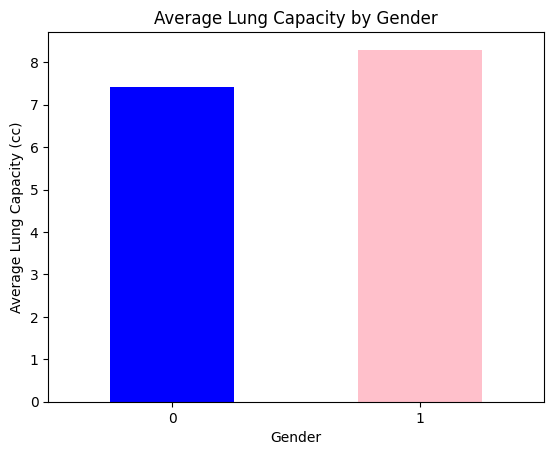

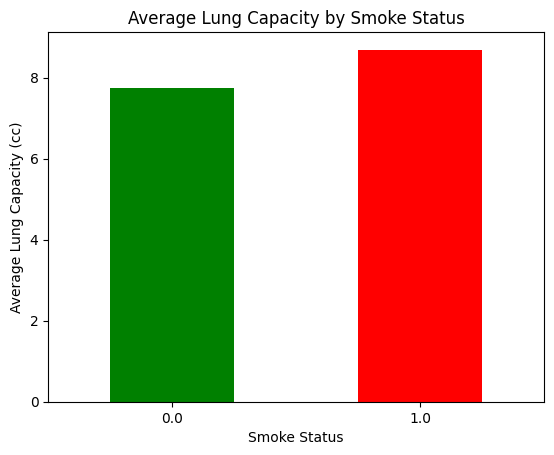

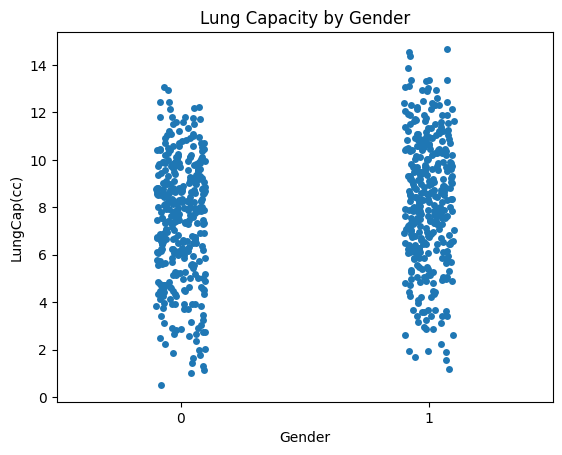

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe df is already loaded and cleaned


# 1. Average Lung Capacity by Gender
pivot_gender = df.pivot_table(values="LungCap(cc)", index="Gender", aggfunc="mean")
print("Average Lung Capacity by Gender:")
print(pivot_gender)

# 2. Average Lung Capacity by Smoke Status
pivot_smoke = df.pivot_table(values="LungCap(cc)", index="Smoke", aggfunc="mean")
print("\nAverage Lung Capacity by Smoking Status:")
print(pivot_smoke)

# 5. Average Lung Capacity by Age Group (Binned)
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Age Group'] = pd.cut(df['Age( years)'], bins=age_bins, labels=age_labels)

pivot_age = df.pivot_table(values="LungCap(cc)", index="Age Group", aggfunc="mean")
print("\nAverage Lung Capacity by Age Group:")
print(pivot_age)

# 6. Average Lung Capacity by Height Group (Binned)
height_bins = [50, 60, 70, 80, 90, 100]
height_labels = ['50-60', '61-70', '71-80', '81-90', '91-100']
df['Height Group'] = pd.cut(df['Height(inches)'], bins=height_bins, labels=height_labels)

pivot_height = df.pivot_table(values="LungCap(cc)", index="Height Group", aggfunc="mean")
print("\nAverage Lung Capacity by Height Group:")
print(pivot_height)

# Bar chart: Average Lung Capacity by Gender
gender_avg = df.groupby('Gender')['LungCap(cc)'].mean()
gender_avg.plot(kind='bar', color=['blue', 'pink'], title="Average Lung Capacity by Gender")
plt.xlabel('Gender')
plt.ylabel('Average Lung Capacity (cc)')
plt.xticks(rotation=0)
plt.show()

# Bar chart: Average Lung Capacity by Smoke Status
smoke_avg = df.groupby('Smoke')['LungCap(cc)'].mean()
smoke_avg.plot(kind='bar', color=['green', 'red'], title="Average Lung Capacity by Smoke Status")
plt.xlabel('Smoke Status')
plt.ylabel('Average Lung Capacity (cc)')
plt.xticks(rotation=0)
plt.show()

# Strip plot for Lung Capacity by Gender
sns.stripplot(x="Gender", y="LungCap(cc)", data=df, jitter=True)
plt.title('Lung Capacity by Gender')
plt.show()



